In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

### Reading the dataset

In [2]:
df = pd.read_csv('D:/Programming/Data_Science/Codes/5_Machine_Learning/static/height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.shape

(23, 2)

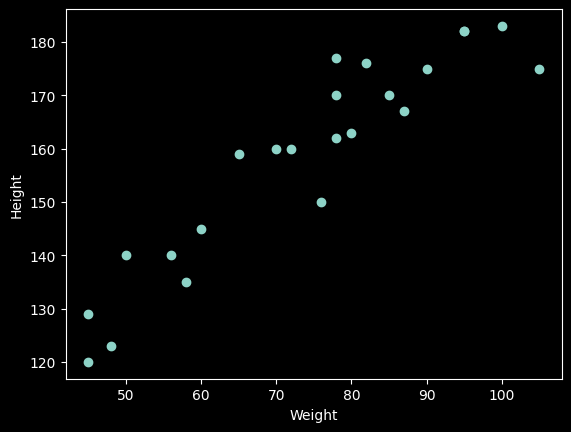

In [5]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

### EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [7]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [8]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

### Dividing our dataset into dependent and independent features

In [9]:
X = df[['Weight']] ## Independent features
y = df['Height'] ## Dependent feature

In [10]:
X.shape, y.shape

((23, 1), (23,))

### Splitting the dataset in train and test datasets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

In [12]:
X_train.shape, y_train.shape

((18, 1), (18,))

In [13]:
X_test.shape, y_test.shape

((5, 1), (5,))

### Scaling the data

In [14]:
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

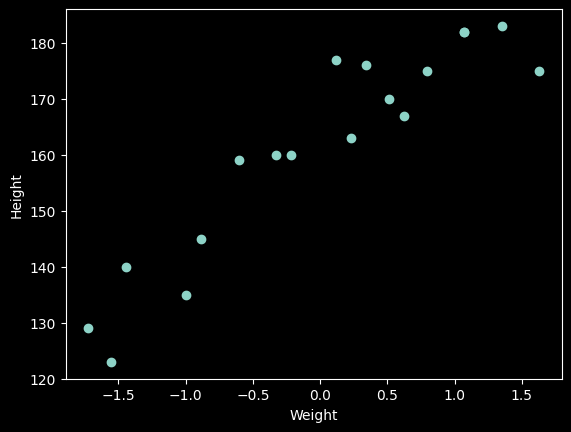

In [17]:
plt.scatter(X_train, y_train)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

### Model training

In [18]:
regressor = LinearRegression()

In [19]:
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
regressor.intercept_

161.16666666666666

In [21]:
regressor.coef_

array([17.26854281])

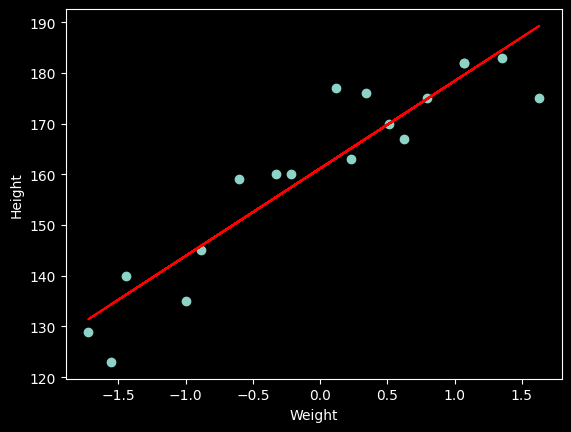

In [22]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

### Prediction

In [23]:
y_pred_test = regressor.predict(X_test)

In [24]:
y_pred_test

array([163.25705945, 142.0315327 , 163.25705945, 161.32746611,
       131.41876933])

In [25]:
y_test

5     162
21    140
9     170
18    150
0     120
Name: Height, dtype: int64

### Performance Metric: MAE, MSE, RMSE

In [26]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print('MSE: ', mse)
print('MAE: ', mae)
print('RMSE: ', rmse)

MSE:  61.97487046197748
MAE:  6.555553628717587
RMSE:  7.872411985025776


### Accuracy of the model: R-squared and Adj-R-squared

### R square 
Formula

$ R^2 = 1 - \frac{SSR}{SST} $

- R^2	=	Accuracy of the modele
- SSR	=	sum of squares of residuals = $ \sum_{i = 1}^{n} {( y_i - h_\theta(x))}^2 $
- SST	=	total sum of squares = $ \sum_{i = 1}^{n} {( y_i - \bar{y_i})}^2 $

In [27]:
score = r2_score(y_test, y_pred_test)
print("Accuracy score: ", score)

Accuracy score:  0.7976264679271895


### Adjusted r square

**Adjusted R2** $ = 1 – (1-R^2)\frac{n-1}{n-k-1} $

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [28]:
adj_score = 1 - ((1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print("Adjusted accuracy score: ", adj_score)

Adjusted accuracy score:  0.7301686239029193
